In [1]:
import sys
import os

# 確認工作目錄
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# 確保專案根目錄在 sys.path 中 (通常預設就在，但為了保險起見)
if current_dir not in sys.path:
    sys.path.append(current_dir)
    print(f"Added {current_dir} to sys.path")

# 注意：我們不再將 'src' 加入 sys.path，因為我們現在使用 'from src.xxx import yyy' 的方式
# 這樣可以避免模組名稱衝突並保持結構清晰

Current working directory: c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project
Added c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project to sys.path


## 1. 啟動遊戲 (PvP / PvAI)
執行下方儲存格以開啟遊戲視窗。

In [2]:
import sys
from PyQt5.QtWidgets import QApplication
from src.New_moon_game import MainWindow
from src.ai_logic import GreedyAI, AlphazeroAI
import os

# 確保只有一個 QApplication 實例
app = QApplication.instance()
if app is None:
    app = QApplication(sys.argv)

# 設定 AI (可選)
# P2 使用 AlphaZero (如果模型存在)，否則使用 GreedyAI
model_path = os.path.join(current_dir, 'models', 'alphazero_model.h5')
if os.path.exists(model_path):
    print("Loading AlphaZero AI...")
    # 注意：這裡需要知道 input_dim 和 num_actions，通常從 train_alphazero 導入或寫死
    # 為了簡化，這裡假設使用預設地圖 (Large)
    from src.adj_map import DEFAULT_BOARD
    NUM_NODES = len(DEFAULT_BOARD.adj_map)
    INPUT_DIM = 12 * NUM_NODES + 27
    NUM_ACTIONS = 3 * NUM_NODES
else:
    print("Model not found")

# AlphazeroAI('AlphaZero', model_path=model_path, input_dim=INPUT_DIM, num_actions=NUM_ACTIONS)
ai_players = {
    'P2': GreedyAI("boo_shit")
}

window = MainWindow(ai_players=ai_players)
window.show()

# 在 Notebook 中執行 PyQt5 事件迴圈
app.exec_()

Loading AlphaZero AI...

 遊戲結束 (Game Over) 
 獲勝者: Player 1 獲勝！
--------------------
 最終分數 (Final Scores):
   Player 1: 35
   Player 2: 28
--------------------
 領地佔有 (Territory Control):
   Player 1: 13 / 24 (54.2%)
   Player 2: 10 / 24 (41.7%)


 遊戲結束 (Game Over) 
 獲勝者: Player 1 獲勝！
--------------------
 最終分數 (Final Scores):
   Player 1: 35
   Player 2: 28
--------------------
 領地佔有 (Territory Control):
   Player 1: 13 / 24 (54.2%)
   Player 2: 10 / 24 (41.7%)


 遊戲結束 (Game Over) 
 獲勝者: Player 1 獲勝！
--------------------
 最終分數 (Final Scores):
   Player 1: 35
   Player 2: 28
--------------------
 領地佔有 (Territory Control):
   Player 1: 13 / 24 (54.2%)
   Player 2: 10 / 24 (41.7%)


 遊戲結束 (Game Over) 
 獲勝者: Player 1 獲勝！
--------------------
 最終分數 (Final Scores):
   Player 1: 35
   Player 2: 28
--------------------
 領地佔有 (Territory Control):
   Player 1: 13 / 24 (54.2%)
   Player 2: 10 / 24 (41.7%)



0

## 2. 視覺化訓練 (Training with UI)
執行下方儲存格以開啟訓練視窗，即時觀看 AlphaZero 自我對戰與學習過程。

In [5]:
import sys
from PyQt5.QtWidgets import QApplication
from src.train_with_ui import TrainingWindow

app = QApplication.instance()
if app is None:
    app = QApplication(sys.argv)

train_window = TrainingWindow()
train_window.show()

app.exec_()

Initializing AlphaZero AI...
Loading model from c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
Loaded history: starting from epoch 423

=== Epoch 424/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 3-6
Starting self-play game 2/2
Game finished. Winner: P2, Score: 3-6
Starting self-play game 2/2
Game finished. Winner: P1, Score: 11-4
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P1, Score: 11-4
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.5992 - policy_loss: 2.5889 - value_loss: 1.0103
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.5992 - policy_loss: 2.5889 - value_loss: 1.0103
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.3353 - policy_loss: 2.4036 - value_loss: 0.9317
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 425/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 7-13
Starting self-play game 2/2
Game finished. Winner: P2, Score: 7-13
Starting self-play game 2/2
Game finished. Winner: Draw, Score: 16-16
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: Draw, Score: 16-16
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.0781 - policy_loss: 2.3868 - value_loss: 0.6913
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.0781 - policy_loss: 2.3868 - value_loss: 0.6913
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.0629 - policy_loss: 

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 426/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 3-14
Starting self-play game 2/2
Game finished. Winner: P2, Score: 3-14
Starting self-play game 2/2
Game finished. Winner: P2, Score: 14-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 14-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.3762 - policy_loss: 2.5025 - value_loss: 0.8737
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.3762 - policy_loss: 2.5025 - value_loss: 0.8737
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.2578 - policy_loss: 2.41

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 427/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 17-20
Starting self-play game 2/2
Game finished. Winner: P2, Score: 17-20
Starting self-play game 2/2
Game finished. Winner: P2, Score: 19-22
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 19-22
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4.0672 - policy_loss: 2.4612 - value_loss: 1.6060
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4.0672 - policy_loss: 2.4612 - value_loss: 1.6060
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.8883 - policy_loss: 2.

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 428/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 6-24
Starting self-play game 2/2
Game finished. Winner: P2, Score: 6-24
Starting self-play game 2/2
Game finished. Winner: P2, Score: 10-13
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 10-13
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.0425 - policy_loss: 2.2832 - value_loss: 0.7593
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.0425 - policy_loss: 2.2832 - value_loss: 0.7593
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.9114 - policy_loss: 2.19

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 429/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 5-9
Starting self-play game 2/2
Game finished. Winner: P2, Score: 5-9
Starting self-play game 2/2
Game finished. Winner: P2, Score: 4-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 4-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.3644 - policy_loss: 2.3800 - value_loss: 0.9844
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.3644 - policy_loss: 2.3800 - value_loss: 0.9844
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.3838 - policy_loss: 2.3964 -

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 430/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 11-21
Starting self-play game 2/2
Game finished. Winner: P2, Score: 11-21
Starting self-play game 2/2
Game finished. Winner: P2, Score: 10-20
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 10-20
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.4140 - policy_loss: 2.3851 - value_loss: 1.0289
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.4140 - policy_loss: 2.3851 - value_loss: 1.0289
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.3028 - policy_loss: 2.

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 431/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 9-18
Starting self-play game 2/2
Game finished. Winner: P2, Score: 9-18
Starting self-play game 2/2
Game finished. Winner: P2, Score: 9-13
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 9-13
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.3319 - policy_loss: 2.2835 - value_loss: 1.0483
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.3319 - policy_loss: 2.2835 - value_loss: 1.0483
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.3431 - policy_loss: 2.2974

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 432/1000 ===
Starting self-play game 1/2
Game finished. Winner: Draw, Score: 10-10
Starting self-play game 2/2
Game finished. Winner: Draw, Score: 10-10
Starting self-play game 2/2
Game finished. Winner: P2, Score: 14-15
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 14-15
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.0474 - policy_loss: 2.3499 - value_loss: 0.6975
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.0474 - policy_loss: 2.3499 - value_loss: 0.6975
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.9372 - policy_loss

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 433/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 13-26
Starting self-play game 2/2
Game finished. Winner: P2, Score: 13-26
Starting self-play game 2/2
Game finished. Winner: P2, Score: 11-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 11-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.4700 - policy_loss: 2.4181 - value_loss: 1.0519
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.4700 - policy_loss: 2.4181 - value_loss: 1.0519
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.4477 - policy_loss: 2.

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 434/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 14-20
Starting self-play game 2/2
Game finished. Winner: P2, Score: 14-20
Starting self-play game 2/2
Game finished. Winner: P1, Score: 19-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P1, Score: 19-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.1170 - policy_loss: 2.2508 - value_loss: 0.8662
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.1170 - policy_loss: 2.2508 - value_loss: 0.8662
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.0546 - policy_loss: 2.

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 435/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 7-12
Starting self-play game 2/2
Game finished. Winner: P2, Score: 7-12
Starting self-play game 2/2
Game finished. Winner: P2, Score: 0-11
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 0-11
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.3660 - policy_loss: 2.4197 - value_loss: 0.9463
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.3660 - policy_loss: 2.4197 - value_loss: 0.9463
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.3136 - policy_loss: 2.3776

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 436/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 6-20
Starting self-play game 2/2
Game finished. Winner: P2, Score: 6-20
Starting self-play game 2/2
Game finished. Winner: P2, Score: 7-23
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 7-23
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 3.1127 - policy_loss: 2.3078 - value_loss: 0.8049
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 3.1127 - policy_loss: 2.3078 - value_loss: 0.8049
Epoch 2/2
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3.0488 - policy_loss: 2.2399

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 437/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 11-29
Starting self-play game 2/2
Game finished. Winner: P2, Score: 11-29
Starting self-play game 2/2
Game finished. Winner: P2, Score: 8-20
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 8-20
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 3.0260 - policy_loss: 2.3627 - value_loss: 0.6633
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 3.0260 - policy_loss: 2.3627 - value_loss: 0.6633
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 2.9553 - policy_loss: 2.32

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 438/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 9-18
Starting self-play game 2/2
Game finished. Winner: P2, Score: 9-18
Starting self-play game 2/2
Game finished. Winner: P2, Score: 17-19
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 17-19
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.8402 - policy_loss: 2.5888 - value_loss: 1.2514
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.8402 - policy_loss: 2.5888 - value_loss: 1.2514
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 3.8080 - policy_loss: 2.50

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 439/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 8-19
Starting self-play game 2/2
Game finished. Winner: P2, Score: 8-19
Starting self-play game 2/2
Game finished. Winner: P2, Score: 16-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 16-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3.1471 - policy_loss: 2.2219 - value_loss: 0.9252
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3.1471 - policy_loss: 2.2219 - value_loss: 0.9252
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 3.1381 - policy_loss: 2.24

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 440/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 12-15
Starting self-play game 2/2
Game finished. Winner: P2, Score: 12-15
Starting self-play game 2/2
Game finished. Winner: P2, Score: 16-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 16-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 3.6884 - policy_loss: 2.5455 - value_loss: 1.1429
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 3.6884 - policy_loss: 2.5455 - value_loss: 1.1429
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3.5833 - policy_loss: 2.

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 441/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 16-18
Starting self-play game 2/2
Game finished. Winner: P2, Score: 16-18
Starting self-play game 2/2
Game finished. Winner: P2, Score: 12-13
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 12-13
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3.4042 - policy_loss: 2.4741 - value_loss: 0.9301
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3.4042 - policy_loss: 2.4741 - value_loss: 0.9301
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 3.4628 - policy_loss: 2.

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 442/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 15-22
Starting self-play game 2/2
Game finished. Winner: P2, Score: 15-22
Starting self-play game 2/2
Game finished. Winner: P2, Score: 9-11
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 9-11
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.5229 - policy_loss: 2.4139 - value_loss: 1.1090
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.5229 - policy_loss: 2.4139 - value_loss: 1.1090
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3.4659 - policy_loss: 2.36

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 443/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 9-10
Starting self-play game 2/2
Game finished. Winner: P2, Score: 9-10
Starting self-play game 2/2
Game finished. Winner: P2, Score: 4-29
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 4-29
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.0779 - policy_loss: 2.2850 - value_loss: 0.7929
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.0779 - policy_loss: 2.2850 - value_loss: 0.7929
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.0077 - policy_loss: 2.2862

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 444/1000 ===
Starting self-play game 1/2

History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 444/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 9-30
Starting self-play game 2/2
Game finished. Winner: P2, Score: 9-30
Starting self-play game 2/2
Game finished. Winner: P2, Score: 13-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 13-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.2266 - policy_loss: 2.4702 - value_loss: 0.7564
Epoch 2/2
2/2

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 445/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 7-8
Starting self-play game 2/2
Game finished. Winner: P2, Score: 7-8
Starting self-play game 2/2
Game finished. Winner: P2, Score: 9-13
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 9-13
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.5897 - policy_loss: 2.4135 - value_loss: 1.1762
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.5897 - policy_loss: 2.4135 - value_loss: 1.1762
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.5257 - policy_loss: 2.3844 -

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 446/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 7-13
Starting self-play game 2/2
Game finished. Winner: P2, Score: 7-13
Starting self-play game 2/2
Game finished. Winner: P2, Score: 14-16
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 14-16
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.0088 - policy_loss: 2.1534 - value_loss: 0.8554
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.0088 - policy_loss: 2.1534 - value_loss: 0.8554
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.0769 - policy_loss: 2.16

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 447/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 7-9
Starting self-play game 2/2
Game finished. Winner: P2, Score: 7-9
Starting self-play game 2/2
Game finished. Winner: P2, Score: 11-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 11-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.0918 - policy_loss: 2.2010 - value_loss: 0.8908
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.0918 - policy_loss: 2.2010 - value_loss: 0.8908
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.0303 - policy_loss: 2.1809

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 448/1000 ===
Starting self-play game 1/2
Game finished. Winner: P1, Score: 18-6
Starting self-play game 2/2
Game finished. Winner: P1, Score: 18-6
Starting self-play game 2/2
Game finished. Winner: P1, Score: 33-18
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P1, Score: 33-18
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.2491 - policy_loss: 2.3061 - value_loss: 0.9430
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.2491 - policy_loss: 2.3061 - value_loss: 0.9430
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.1576 - policy_loss: 2.37

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 449/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 4-23
Starting self-play game 2/2
Game finished. Winner: P2, Score: 4-23
Starting self-play game 2/2
Game finished. Winner: P2, Score: 11-19
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 11-19
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.0626 - policy_loss: 2.2664 - value_loss: 0.7962
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.0626 - policy_loss: 2.2664 - value_loss: 0.7962
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.0159 - policy_loss: 2.22

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 450/1000 ===
Starting self-play game 1/2
Game finished. Winner: Draw, Score: 17-17
Starting self-play game 2/2
Game finished. Winner: Draw, Score: 17-17
Starting self-play game 2/2
Game finished. Winner: P2, Score: 12-20
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 12-20
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.5834 - policy_loss: 2.1710 - value_loss: 0.4123
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.5834 - policy_loss: 2.1710 - value_loss: 0.4123
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.5523 - policy_loss

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 451/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 9-10
Starting self-play game 2/2
Game finished. Winner: P2, Score: 9-10
Starting self-play game 2/2
Game finished. Winner: P2, Score: 16-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 16-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.0112 - policy_loss: 2.3919 - value_loss: 0.6193
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.0112 - policy_loss: 2.3919 - value_loss: 0.6193
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.7640 - policy_loss: 2.15

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 452/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 10-14
Starting self-play game 2/2
Game finished. Winner: P2, Score: 10-14
Starting self-play game 2/2
Game finished. Winner: P2, Score: 9-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 9-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.3844 - policy_loss: 2.1833 - value_loss: 1.2011
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.3844 - policy_loss: 2.1833 - value_loss: 1.2011
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.1695 - policy_loss: 2.12

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 453/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 10-16
Starting self-play game 2/2
Game finished. Winner: P2, Score: 10-16
Starting self-play game 2/2
Game finished. Winner: P2, Score: 6-7
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 6-7
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.1005 - policy_loss: 2.2951 - value_loss: 0.8054
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.1005 - policy_loss: 2.2951 - value_loss: 0.8054
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.0598 - policy_loss: 2.2519

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 454/1000 ===
Starting self-play game 1/2
Game finished. Winner: Draw, Score: 14-14
Starting self-play game 2/2
Game finished. Winner: Draw, Score: 14-14
Starting self-play game 2/2
Game finished. Winner: P2, Score: 4-10
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 4-10
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.9778 - policy_loss: 2.3936 - value_loss: 0.5841
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.9778 - policy_loss: 2.3936 - value_loss: 0.5841
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.9121 - policy_loss: 

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 455/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 4-19
Starting self-play game 2/2
Game finished. Winner: P2, Score: 4-19
Starting self-play game 2/2
Game finished. Winner: P2, Score: 10-14
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 10-14
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.9632 - policy_loss: 2.2012 - value_loss: 0.7619
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.9632 - policy_loss: 2.2012 - value_loss: 0.7619
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.9495 - policy_loss: 2.22

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 456/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 8-15
Starting self-play game 2/2
Game finished. Winner: P2, Score: 8-15
Starting self-play game 2/2
Game finished. Winner: P1, Score: 13-3
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P1, Score: 13-3
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3.2059 - policy_loss: 2.3222 - value_loss: 0.8836
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3.2059 - policy_loss: 2.3222 - value_loss: 0.8836
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 3.1628 - policy_loss: 2.3260

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 457/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 4-17
Starting self-play game 2/2
Game finished. Winner: P2, Score: 4-17
Starting self-play game 2/2
Game finished. Winner: P2, Score: 10-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 10-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 3.2908 - policy_loss: 2.3668 - value_loss: 0.9240
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 3.2908 - policy_loss: 2.3668 - value_loss: 0.9240
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 3.1983 - policy_loss: 2.26

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 458/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 17-22
Starting self-play game 2/2
Game finished. Winner: P2, Score: 17-22
Starting self-play game 2/2
Game finished. Winner: P2, Score: 0-10
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 0-10
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 3.5695 - policy_loss: 2.2999 - value_loss: 1.2696
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 3.5695 - policy_loss: 2.2999 - value_loss: 1.2696
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 3.3386 - policy_loss: 2.22

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 459/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 14-16
Starting self-play game 2/2
Game finished. Winner: P2, Score: 14-16
Starting self-play game 2/2
Game finished. Winner: P2, Score: 9-13
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 9-13
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 3.5748 - policy_loss: 2.1947 - value_loss: 1.3801
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 3.5748 - policy_loss: 2.1947 - value_loss: 1.3801
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 3.6082 - policy_loss: 2.21

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 460/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 15-17
Starting self-play game 2/2
Game finished. Winner: P2, Score: 15-17
Starting self-play game 2/2
Game finished. Winner: P1, Score: 16-6
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P1, Score: 16-6
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 3.2563 - policy_loss: 2.3083 - value_loss: 0.9480
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 3.2563 - policy_loss: 2.3083 - value_loss: 0.9480
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 3.1767 - policy_loss: 2.28

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 461/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 8-11
Starting self-play game 2/2
Game finished. Winner: P2, Score: 8-11
Starting self-play game 2/2
Game finished. Winner: P2, Score: 13-14
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 13-14
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 2.9938 - policy_loss: 2.1918 - value_loss: 0.8020
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 2.9938 - policy_loss: 2.1918 - value_loss: 0.8020
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 3.0065 - policy_loss: 2.23

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 462/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 8-25
Starting self-play game 2/2
Game finished. Winner: P2, Score: 8-25
Starting self-play game 2/2
Game finished. Winner: P1, Score: 11-8
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P1, Score: 11-8
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.1915 - policy_loss: 2.2622 - value_loss: 0.9293
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.1915 - policy_loss: 2.2622 - value_loss: 0.9293
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3.0473 - policy_loss: 2.2002

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 463/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 5-18
Starting self-play game 2/2
Game finished. Winner: P2, Score: 5-18
Starting self-play game 2/2
Game finished. Winner: P1, Score: 17-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P1, Score: 17-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 3.3245 - policy_loss: 2.3548 - value_loss: 0.9697
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 3.3245 - policy_loss: 2.3548 - value_loss: 0.9697
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3.3052 - policy_loss: 2.37

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 464/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 5-24
Starting self-play game 2/2
Game finished. Winner: P2, Score: 5-24
Starting self-play game 2/2
Game finished. Winner: P2, Score: 10-11
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 10-11
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 3.4976 - policy_loss: 2.5189 - value_loss: 0.9787
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 3.4976 - policy_loss: 2.5189 - value_loss: 0.9787
Epoch 2/2
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3.5942 - policy_loss: 2.52

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 465/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 15-16
Starting self-play game 2/2
Game finished. Winner: P2, Score: 15-16
Starting self-play game 2/2
Game finished. Winner: P2, Score: 7-26
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 7-26
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.1920 - policy_loss: 2.3044 - value_loss: 0.8876
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.1920 - policy_loss: 2.3044 - value_loss: 0.8876
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3.2478 - policy_loss: 2.34

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 466/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 10-16
Starting self-play game 2/2
Game finished. Winner: P2, Score: 10-16
Starting self-play game 2/2
Game finished. Winner: P2, Score: 12-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 12-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3.0279 - policy_loss: 2.2026 - value_loss: 0.8253
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3.0279 - policy_loss: 2.2026 - value_loss: 0.8253
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 2.9161 - policy_loss: 2.

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 467/1000 ===
Starting self-play game 1/2
Game finished. Winner: P1, Score: 14-11
Starting self-play game 2/2
Game finished. Winner: P1, Score: 14-11
Starting self-play game 2/2
Game finished. Winner: P2, Score: 11-23
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 11-23
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 2.9192 - policy_loss: 2.1398 - value_loss: 0.7794
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 2.9192 - policy_loss: 2.1398 - value_loss: 0.7794
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 2.9119 - policy_loss: 2.

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 468/1000 ===
Starting self-play game 1/2
Game finished. Winner: Draw, Score: 16-16
Starting self-play game 2/2
Game finished. Winner: Draw, Score: 16-16
Starting self-play game 2/2
Game finished. Winner: P1, Score: 24-18
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P1, Score: 24-18
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.6974 - policy_loss: 2.2573 - value_loss: 0.4401
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.6974 - policy_loss: 2.2573 - value_loss: 0.4401
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.5923 - policy_loss

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 469/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 6-14
Starting self-play game 2/2
Game finished. Winner: P2, Score: 6-14
Starting self-play game 2/2
Game finished. Winner: Draw, Score: 18-18
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: Draw, Score: 18-18
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.6755 - policy_loss: 2.1342 - value_loss: 0.5413
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.6755 - policy_loss: 2.1342 - value_loss: 0.5413
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.6312 - policy_loss: 

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 470/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 12-13
Starting self-play game 2/2
Game finished. Winner: P2, Score: 12-13
Starting self-play game 2/2
Game finished. Winner: P2, Score: 6-16
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 6-16
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.2770 - policy_loss: 2.3619 - value_loss: 0.9151
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.2770 - policy_loss: 2.3619 - value_loss: 0.9151
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.1971 - policy_loss: 2.26

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 471/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 6-15
Starting self-play game 2/2
Game finished. Winner: P2, Score: 6-15
Starting self-play game 2/2
Game finished. Winner: Draw, Score: 4-4
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: Draw, Score: 4-4
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.7433 - policy_loss: 2.3454 - value_loss: 0.3979
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.7433 - policy_loss: 2.3454 - value_loss: 0.3979
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.6566 - policy_loss: 2.26

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 472/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 15-18
Starting self-play game 2/2
Game finished. Winner: P2, Score: 15-18
Starting self-play game 2/2
Game finished. Winner: P1, Score: 21-7
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P1, Score: 21-7
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 3.6014 - policy_loss: 2.4645 - value_loss: 1.1369
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 3.6014 - policy_loss: 2.4645 - value_loss: 1.1369
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.4475 - policy_loss: 2.30

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 473/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 7-18
Starting self-play game 2/2
Game finished. Winner: P2, Score: 7-18
Starting self-play game 2/2
Game finished. Winner: P2, Score: 10-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 10-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.3266 - policy_loss: 2.2349 - value_loss: 1.0917
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.3266 - policy_loss: 2.2349 - value_loss: 1.0917
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 3.2144 - policy_loss: 2.13

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 474/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 7-11
Starting self-play game 2/2
Game finished. Winner: P2, Score: 7-11
Starting self-play game 2/2
Game finished. Winner: P2, Score: 11-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 11-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.1385 - policy_loss: 2.2392 - value_loss: 0.8994
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.1385 - policy_loss: 2.2392 - value_loss: 0.8994
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.1004 - policy_loss: 2.21

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 475/1000 ===
Starting self-play game 1/2
Game finished. Winner: P1, Score: 24-10
Starting self-play game 2/2
Game finished. Winner: P1, Score: 24-10
Starting self-play game 2/2
Game finished. Winner: P1, Score: 17-11
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P1, Score: 17-11
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.1231 - policy_loss: 2.1831 - value_loss: 0.9400
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.1231 - policy_loss: 2.1831 - value_loss: 0.9400
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.1119 - policy_loss: 2.

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 476/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 16-18
Starting self-play game 2/2
Game finished. Winner: P2, Score: 16-18
Starting self-play game 2/2
Game finished. Winner: P2, Score: 10-26
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 10-26
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.1461 - policy_loss: 2.1871 - value_loss: 0.9590
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.1461 - policy_loss: 2.1871 - value_loss: 0.9590
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.1797 - policy_loss: 2.

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 477/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 11-13
Starting self-play game 2/2
Game finished. Winner: P2, Score: 11-13
Starting self-play game 2/2
Game finished. Winner: P2, Score: 9-18
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 9-18
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.2376 - policy_loss: 2.2726 - value_loss: 0.9650
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.2376 - policy_loss: 2.2726 - value_loss: 0.9650
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.1347 - policy_loss: 2.21

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 478/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 9-13
Starting self-play game 2/2
Game finished. Winner: P2, Score: 9-13
Starting self-play game 2/2
Game finished. Winner: Draw, Score: 14-14
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: Draw, Score: 14-14
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 2.9432 - policy_loss: 2.3485 - value_loss: 0.5947
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 2.9432 - policy_loss: 2.3485 - value_loss: 0.5947
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.6854 - policy_loss: 

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 479/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 3-9
Starting self-play game 2/2
Game finished. Winner: P2, Score: 3-9
Starting self-play game 2/2
Game finished. Winner: P2, Score: 8-20
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 8-20
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3.0715 - policy_loss: 2.1786 - value_loss: 0.8929
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3.0715 - policy_loss: 2.1786 - value_loss: 0.8929
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2.9850 - policy_loss: 2.1093 -

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 480/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 11-24
Starting self-play game 2/2
Game finished. Winner: P2, Score: 11-24
Starting self-play game 2/2
Game finished. Winner: P2, Score: 7-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 7-17
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 3.3376 - policy_loss: 2.2952 - value_loss: 1.0424
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 3.3376 - policy_loss: 2.2952 - value_loss: 1.0424
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.2656 - policy_loss: 2.21

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 481/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 13-15
Starting self-play game 2/2
Game finished. Winner: P2, Score: 13-15
Starting self-play game 2/2
Game finished. Winner: P2, Score: 12-18
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 12-18
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3.3121 - policy_loss: 2.2581 - value_loss: 1.0541
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3.3121 - policy_loss: 2.2581 - value_loss: 1.0541
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.1486 - policy_loss: 2.

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 482/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 8-15
Starting self-play game 2/2
Game finished. Winner: P2, Score: 8-15
Starting self-play game 2/2
Game finished. Winner: Draw, Score: 18-18
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: Draw, Score: 18-18
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 2.5783 - policy_loss: 2.0962 - value_loss: 0.4820
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 2.5783 - policy_loss: 2.0962 - value_loss: 0.4820
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 2.6436 - policy_loss: 

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 483/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 7-9
Starting self-play game 2/2
Game finished. Winner: P2, Score: 7-9
Starting self-play game 2/2
Game finished. Winner: P2, Score: 3-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 3-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 2.9246 - policy_loss: 2.0906 - value_loss: 0.8340
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 2.9246 - policy_loss: 2.0906 - value_loss: 0.8340
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.9476 - policy_loss: 2.1001 -

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 484/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 9-12
Starting self-play game 2/2
Game finished. Winner: P2, Score: 9-12
Starting self-play game 2/2
Game finished. Winner: P2, Score: 7-8
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 7-8
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 3.0863 - policy_loss: 2.1579 - value_loss: 0.9284
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 3.0863 - policy_loss: 2.1579 - value_loss: 0.9284
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 3.0070 - policy_loss: 2.1414 -

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 485/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 11-19
Starting self-play game 2/2
Game finished. Winner: P2, Score: 11-19
Starting self-play game 2/2
Game finished. Winner: P2, Score: 12-21
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 12-21
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2.9544 - policy_loss: 2.0757 - value_loss: 0.8786
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2.9544 - policy_loss: 2.0757 - value_loss: 0.8786
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 2.9260 - policy_loss: 2.

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 486/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 12-23
Starting self-play game 2/2
Game finished. Winner: P2, Score: 12-23
Starting self-play game 2/2
Game finished. Winner: P2, Score: 6-21
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 6-21
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 2.8156 - policy_loss: 2.0543 - value_loss: 0.7612
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 2.8156 - policy_loss: 2.0543 - value_loss: 0.7612
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2.6946 - policy_loss: 1.95

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 487/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 10-12
Starting self-play game 2/2
Game finished. Winner: P2, Score: 10-12
Starting self-play game 2/2
Game finished. Winner: P1, Score: 13-7
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P1, Score: 13-7
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3.0647 - policy_loss: 2.0377 - value_loss: 1.0270
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3.0647 - policy_loss: 2.0377 - value_loss: 1.0270
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 2.8971 - policy_loss: 1.95

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 488/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 3-19
Starting self-play game 2/2
Game finished. Winner: P2, Score: 3-19
Starting self-play game 2/2
Game finished. Winner: P2, Score: 15-16
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 15-16
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3.1419 - policy_loss: 2.1306 - value_loss: 1.0113
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3.1419 - policy_loss: 2.1306 - value_loss: 1.0113
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 3.0567 - policy_loss: 2.10

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 489/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 10-19
Starting self-play game 2/2
Game finished. Winner: P2, Score: 10-19
Starting self-play game 2/2
Game finished. Winner: P2, Score: 9-21
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 9-21
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.2848 - policy_loss: 2.1089 - value_loss: 1.1759
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.2848 - policy_loss: 2.1089 - value_loss: 1.1759
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 3.2990 - policy_loss: 2.21

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 490/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 7-14
Starting self-play game 2/2
Game finished. Winner: P2, Score: 7-14
Starting self-play game 2/2
Game finished. Winner: P2, Score: 13-19
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 13-19
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 3.3692 - policy_loss: 2.1360 - value_loss: 1.2332
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 3.3692 - policy_loss: 2.1360 - value_loss: 1.2332
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 3.2980 - policy_loss: 2.14

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 491/1000 ===
Starting self-play game 1/2
Game finished. Winner: P1, Score: 15-4
Starting self-play game 2/2
Game finished. Winner: P1, Score: 15-4
Starting self-play game 2/2
Game finished. Winner: P1, Score: 15-7
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P1, Score: 15-7
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 3.0283 - policy_loss: 2.1554 - value_loss: 0.8729
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 3.0283 - policy_loss: 2.1554 - value_loss: 0.8729
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2.9722 - policy_loss: 2.1036

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 492/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 10-11
Starting self-play game 2/2
Game finished. Winner: P2, Score: 10-11
Starting self-play game 2/2
Game finished. Winner: P2, Score: 4-20
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 4-20
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 3.0703 - policy_loss: 2.1936 - value_loss: 0.8767
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 3.0703 - policy_loss: 2.1936 - value_loss: 0.8767
Epoch 2/2
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3.0171 - policy_loss: 2.14

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 493/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 11-14
Starting self-play game 2/2
Game finished. Winner: P2, Score: 11-14
Starting self-play game 2/2
Game finished. Winner: P1, Score: 16-7
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P1, Score: 16-7
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.3194 - policy_loss: 2.3427 - value_loss: 0.9767
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.3194 - policy_loss: 2.3427 - value_loss: 0.9767
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.3141 - policy_loss: 2.34

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 494/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 8-16
Starting self-play game 2/2
Game finished. Winner: P2, Score: 8-16
Starting self-play game 2/2
Game finished. Winner: P2, Score: 6-7
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 6-7
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3.3262 - policy_loss: 2.2172 - value_loss: 1.1090
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3.3262 - policy_loss: 2.2172 - value_loss: 1.1090
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3.3759 - policy_loss: 2.1900 -

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 495/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 8-21
Starting self-play game 2/2
Game finished. Winner: P2, Score: 8-21
Starting self-play game 2/2
Game finished. Winner: P2, Score: 4-16
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 4-16
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 2.9338 - policy_loss: 2.0817 - value_loss: 0.8521
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 2.9338 - policy_loss: 2.0817 - value_loss: 0.8521
Epoch 2/2
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 2.9019 - policy_loss: 2.1475

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 496/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 4-17
Starting self-play game 2/2
Game finished. Winner: P2, Score: 4-17
Starting self-play game 2/2
Game finished. Winner: P2, Score: 9-22
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 9-22
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 2.9258 - policy_loss: 2.1319 - value_loss: 0.7939
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 2.9258 - policy_loss: 2.1319 - value_loss: 0.7939
Epoch 2/2
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2.8555 - policy_loss: 2.0805

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 497/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 8-14
Starting self-play game 2/2
Game finished. Winner: P2, Score: 8-14
Starting self-play game 2/2
Game finished. Winner: Draw, Score: 32-32
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: Draw, Score: 32-32
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3.0877 - policy_loss: 2.2422 - value_loss: 0.8454
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3.0877 - policy_loss: 2.2422 - value_loss: 0.8454
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3.1777 - policy_loss: 

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 498/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 13-14
Starting self-play game 2/2
Game finished. Winner: P2, Score: 13-14
Starting self-play game 2/2
Game finished. Winner: P2, Score: 13-18
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 13-18
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3.2004 - policy_loss: 2.0378 - value_loss: 1.1627
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3.2004 - policy_loss: 2.0378 - value_loss: 1.1627
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 3.2697 - policy_loss: 2.

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 499/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 14-17
Starting self-play game 2/2
Game finished. Winner: P2, Score: 14-17
Starting self-play game 2/2
Game finished. Winner: P1, Score: 13-3
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P1, Score: 13-3
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 3.1794 - policy_loss: 2.0171 - value_loss: 1.1623
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 3.1794 - policy_loss: 2.0171 - value_loss: 1.1623
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3.1882 - policy_loss: 2.06

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 500/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 8-21
Starting self-play game 2/2
Game finished. Winner: P2, Score: 8-21
Starting self-play game 2/2
Game finished. Winner: P2, Score: 4-30
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 4-30
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.9378 - policy_loss: 2.0972 - value_loss: 0.8406
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.9378 - policy_loss: 2.0972 - value_loss: 0.8406
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 2.9207 - policy_loss: 2.0469

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 501/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 2-27
Starting self-play game 2/2
Game finished. Winner: P2, Score: 2-27
Starting self-play game 2/2
Game finished. Winner: P2, Score: 9-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 9-12
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 2.8830 - policy_loss: 2.0740 - value_loss: 0.8090
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 2.8830 - policy_loss: 2.0740 - value_loss: 0.8090
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 2.8223 - policy_loss: 2.0454

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 502/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 16-17
Starting self-play game 2/2
Game finished. Winner: P2, Score: 16-17
Starting self-play game 2/2
Game finished. Winner: P2, Score: 13-20
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 13-20
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 2.8640 - policy_loss: 2.0231 - value_loss: 0.8409
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 2.8640 - policy_loss: 2.0231 - value_loss: 0.8409
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 2.7735 - policy_loss: 1.

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 503/1000 ===
Starting self-play game 1/2

History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 503/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 11-21
Starting self-play game 2/2
Game finished. Winner: P2, Score: 11-21
Starting self-play game 2/2
Game finished. Winner: Draw, Score: 18-18
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: Draw, Score: 18-18
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 2.5987 - policy_loss: 2.1490 - value_loss: 0.4497
2/2 ━━━

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 504/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 8-10
Starting self-play game 2/2
Game finished. Winner: P2, Score: 8-10
Starting self-play game 2/2
Game finished. Winner: P2, Score: 14-19
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 14-19
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 3.2541 - policy_loss: 2.2356 - value_loss: 1.0185
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 3.2541 - policy_loss: 2.2356 - value_loss: 1.0185
Epoch 2/2
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 3.1602 - policy_loss: 2.15

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 505/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 6-11
Starting self-play game 2/2
Game finished. Winner: P2, Score: 6-11
Starting self-play game 2/2
Game finished. Winner: P2, Score: 15-31
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 15-31
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.9206 - policy_loss: 2.0903 - value_loss: 0.8303
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.9206 - policy_loss: 2.0903 - value_loss: 0.8303
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 2.8536 - policy_loss: 2.02

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 506/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 10-18
Starting self-play game 2/2
Game finished. Winner: P2, Score: 10-18
Starting self-play game 2/2
Game finished. Winner: P2, Score: 0-15
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 0-15
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2.7497 - policy_loss: 1.9380 - value_loss: 0.8118
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2.7497 - policy_loss: 1.9380 - value_loss: 0.8118
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 2.7085 - policy_loss: 1.93

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 507/1000 ===
Starting self-play game 1/2
Game finished. Winner: Draw, Score: 6-6
Starting self-play game 2/2
Game finished. Winner: Draw, Score: 6-6
Starting self-play game 2/2
Game finished. Winner: P2, Score: 7-15
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
Game finished. Winner: P2, Score: 7-15
Training on 48 samples...
Data Shapes - States: (48, 315), Policies: (48, 72), Values: (48, 1)
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.5095 - policy_loss: 1.9876 - value_loss: 0.5219
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.5095 - policy_loss: 1.9876 - value_loss: 0.5219
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.5019 - policy_loss: 1.96

Model saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 508/1000 ===
Starting self-play game 1/2

History saved to c:\Users\tobyy\Desktop\enter_the_folder_name\making_what\moon_doodle_project\models\training_history.pkl

=== Epoch 508/1000 ===
Starting self-play game 1/2


0

## 3. 背景訓練 (Headless Training)
如果不想要 UI，可以直接執行背景訓練腳本。

In [ ]:
from src.train_alphazero import train
# 開始訓練 (會佔用此 Kernel 直到手動停止)
train()

In [ ]:
#STOP OVERLINE WEE HOO

## 4. 訓練數據分析 (Training Analysis)
讀取 `models/training_history.pkl` 並繪製 Loss 曲線與勝率變化。

已載入訓練紀錄：共 507 Epochs


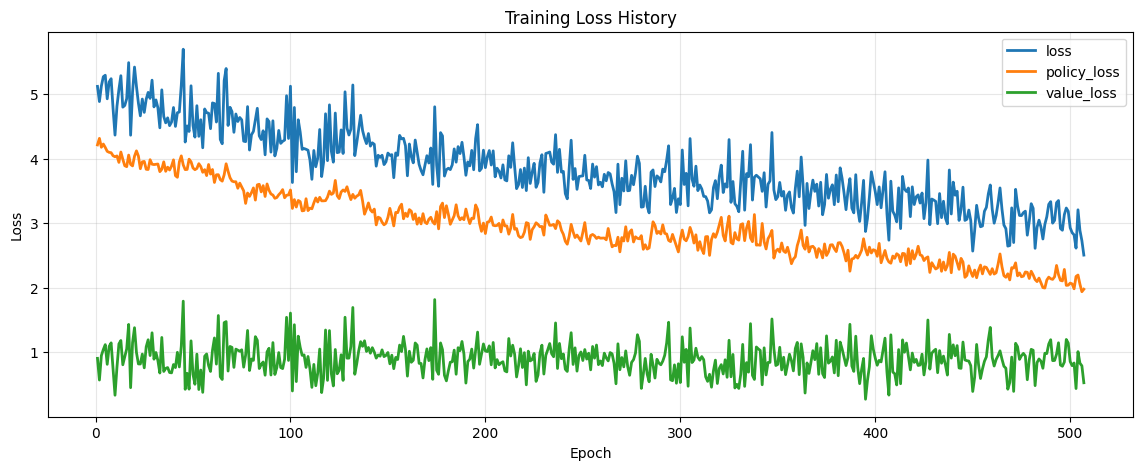

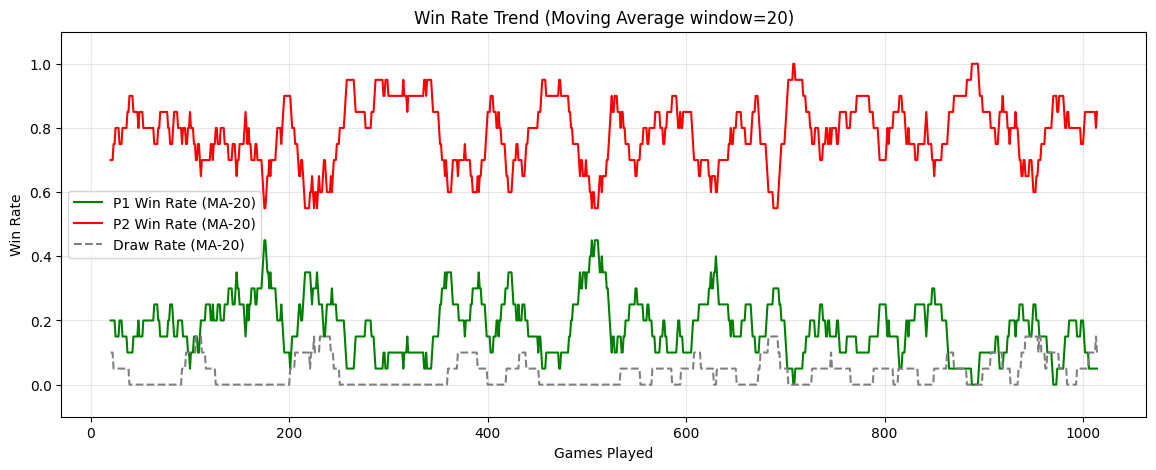

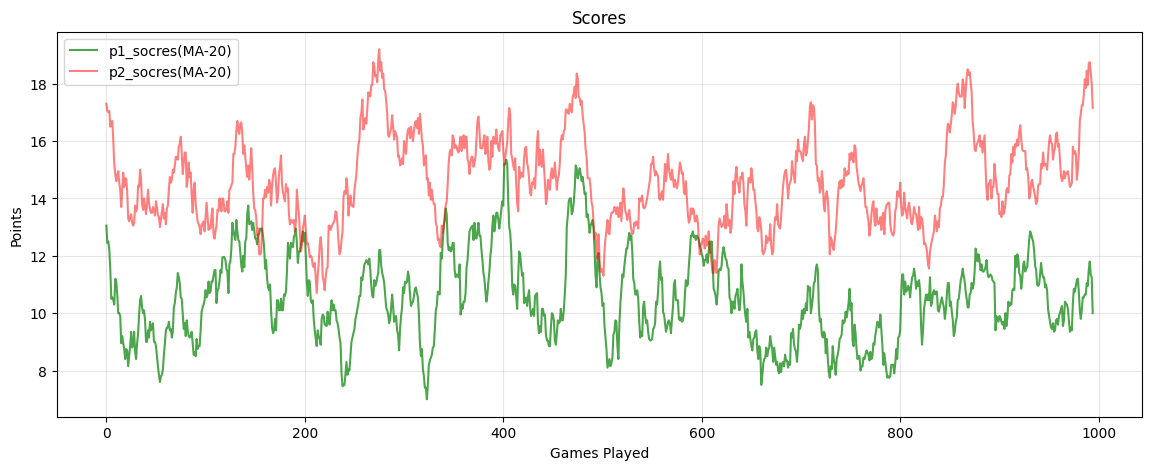

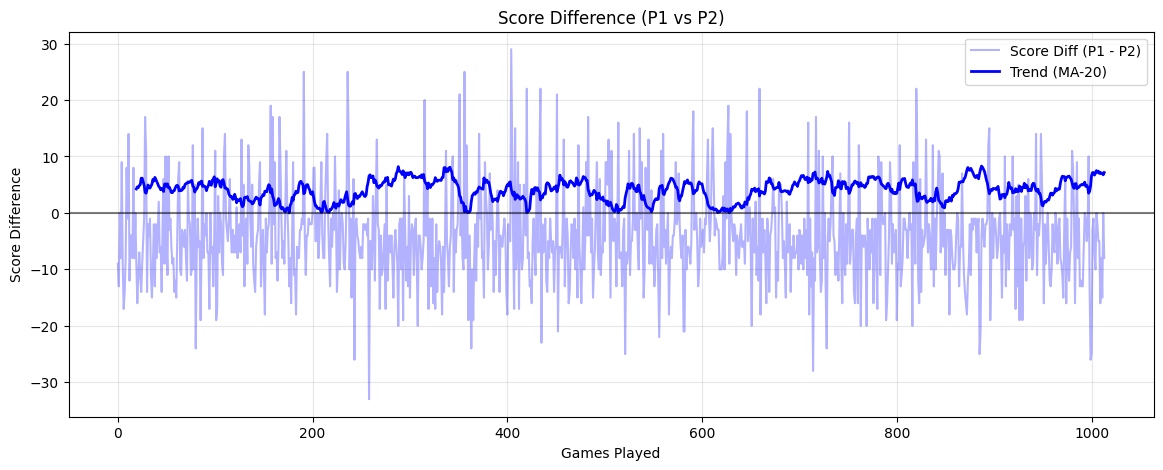


Recent Games:
Game 1010: Winner=P2, Score=15-31, Steps=24
Game 1011: Winner=P2, Score=10-18, Steps=24
Game 1012: Winner=P2, Score=0-15, Steps=24
Game 1013: Winner=Draw, Score=6-6, Steps=24
Game 1014: Winner=P2, Score=7-15, Steps=24


In [10]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np

# 設定路徑
history_path = os.path.join(os.getcwd(), 'models', 'training_history.pkl')

if not os.path.exists(history_path):
    print(f"尚未找到訓練紀錄: {history_path}")
    print("請先執行訓練 (Training) 以產生數據。")
else:
    try:
        with open(history_path, 'rb') as f:
            data = pickle.load(f)
            # 相容性檢查：確保數據格式正確
            if len(data) == 3:
                epoch, loss_history, game_record = data
                print(f"已載入訓練紀錄：共 {epoch} Epochs")
            else:
                print("紀錄格式不符，無法分析。")
                epoch, loss_history, game_record = 0, [], []
    except Exception as e:
        print(f"讀取錯誤: {e}")
        loss_history = []
        game_record = []

    # --- 1. 繪製 Loss 曲線 ---
    if loss_history:
        plt.figure(figsize=(14, 5))
        
        # 取得所有可用的 loss key (例如 'loss', 'policy_loss', 'value_loss')
        keys = loss_history[0].keys()
        epochs_range = range(1, len(loss_history) + 1)
        
        for key in keys:
            vals = [x[key] for x in loss_history]
            plt.plot(epochs_range, vals, label=key, linewidth=2)
            
        plt.title('Training Loss History')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    
    # --- 2. 繪製對戰結果分析 ---
    if game_record:
        # 計算移動平均函數
        def moving_average(data, window_size=10):
            return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

        # 提取勝負數據
        p1_wins = [1 if g['winner'] == 'P1' else 0 for g in game_record]
        p2_wins = [1 if g['winner'] == 'P2' else 0 for g in game_record]
        draws = [1 if g['winner'] == 'Draw' else 0 for g in game_record]
        
        window = min(20, len(game_record))
        if window > 1:
            plt.figure(figsize=(14, 5))
            
            x_axis = range(window, len(game_record) + 1)
            
            plt.plot(x_axis, moving_average(p1_wins, window), label=f'P1 Win Rate (MA-{window})', color='green')
            plt.plot(x_axis, moving_average(p2_wins, window), label=f'P2 Win Rate (MA-{window})', color='red')
            plt.plot(x_axis, moving_average(draws, window), label=f'Draw Rate (MA-{window})', color='gray', linestyle='--')
            
            plt.title(f'Win Rate Trend (Moving Average window={window})')
            plt.xlabel('Games Played')
            plt.ylabel('Win Rate')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.ylim(-0.1, 1.1)
            plt.show()
        
        # 分別顯示分數
        p1_scores = [g['p1_score'] for g in game_record]
        p2_scores = [g['p2_score'] for g in game_record]
        
        plt.figure(figsize=(14, 5))
        plt.plot(moving_average(p1_scores, 20), alpha=0.7, color='green', label='p1_socres(MA-20)')
        plt.plot(moving_average(p2_scores, 20), alpha=0.5, color='red', label='p2_socres(MA-20)')
        plt.title('Scores')
        plt.xlabel('Games Played')
        plt.ylabel('Points')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
        
        
        # 提取分數差數據
        score_diffs = [g['p1_score'] - g['p2_score'] for g in game_record]
        
        plt.figure(figsize=(14, 5))
        plt.plot(score_diffs, alpha=0.3, color='blue', label='Score Diff (P1 - P2)')
        if len(score_diffs) >= window:
            plt.plot(range(window-1, len(score_diffs)), abs(moving_average(score_diffs, window)), color='blue', linewidth=2, label=f'Trend (MA-{window})')
            
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        plt.title('Score Difference (P1 vs P2)')
        plt.xlabel('Games Played')
        plt.ylabel('Score Difference')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
        
        # 顯示最近 5 場數據
        print("\nRecent Games:")
        for i, g in enumerate(game_record[-5:]):
            print(f"Game {len(game_record)-4+i}: Winner={g['winner']}, Score={g['p1_score']}-{g['p2_score']}, Steps={g['steps']}")